## k Nearest Neighbors

### knn Classification

The kNN algorithm is the simplest machine learning algorithm.  Building the model consists only of storing the training dataset.  To make a prediction for a new data point, the algorithm finds the closest points in the training dataset - it's *nearest neighbors*.

In the simplest version, the kNN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.  The prediction is then the known output for the training point.

In [7]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

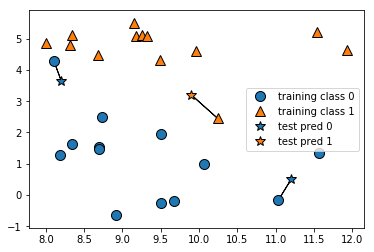

In [8]:
# Plot of classification on the forge dataset, with k=1
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added 3 new data points, shown as stars.  For each of them, we marked the closes point to the training set.  The prediction of the 1NN algorithm is the label(color) of the point.

Instead of considering only the closest neighbor, we can also consider any number k of neighbors.  When considering more than one neighbor, we used *voting* to assign a label.  The majority class among the k neighbors will be the predicted label.

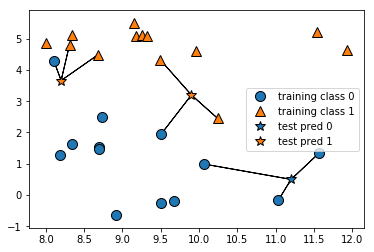

In [9]:
# Plot of classification on the forge dataset, with k=3
mglearn.plots.plot_knn_classification(n_neighbors=3)

Now, we'll apply the kNN algorithm using scikit-learn.

In [11]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# Create the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
# Fit the classifier using the training set
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
# Make predictions on the test data
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [17]:
# Evaluate our model
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### Analyzing KNeighborsClassifier

For 2D datasets, we can also illustrate the prediction for all possible test points in the xy-plane.  We color the plane according to the class that would be assigned to a point in the region.  This lets us view the *decision boundary*, which is the divide between where the algorithm assigns class 0 vs where it assigns class 1.

The following code produces the visualizations of the decision boundaries for k=1, k=3, and k=9.

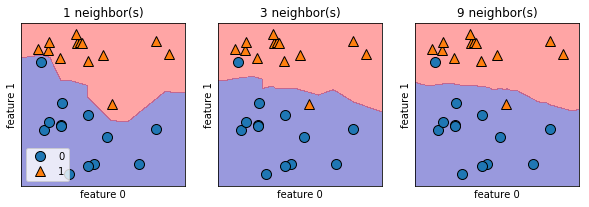

In [22]:
# Visualize the decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As we can see in the figures, using more and more neighbors leads to a smoother decision boundary.  A smoother boundary corresponds to a simpler model.

In other words, using few neighbors corresponds to high model complexity and using many neighbors corresponds to a low model complexity.  

### Classifying the Breast Cancer Dataset

To confirm the connection between model complexity and generalization, we will classify the real-world breast cancer dataset.

In [28]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [31]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
            cancer.target, stratify=cancer.target, random_state=66)

In [32]:
# Test the model for n_neighbors from 1-10
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

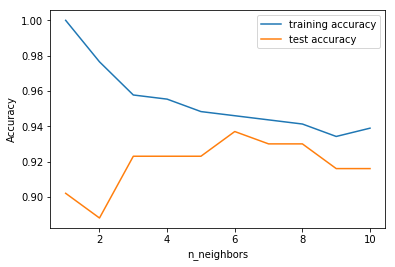

In [33]:
# Plot the classification results
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.  

Note that we can recognize some of the characteristics of overfitting and underfitting.  When only a single neighbor is used, the training set accuracy is perfect.  But, when more neighbors are considered, the model becomes simpler and the training accuracy drops.

For the test set, the best accuracy is at about 6 neighbors.

### K-Neighbors Regression

There is also a regression variant of the kNN algorithm.  Again, let's start by using the single nearest neighbor, this time using the *wave* dataset.  We've added 3 test data points as green starts on the x-axis.  The prediction using a single neighbor is just the target value of the nearest neighbor.  The nearest neighbors are shown using the green stars.

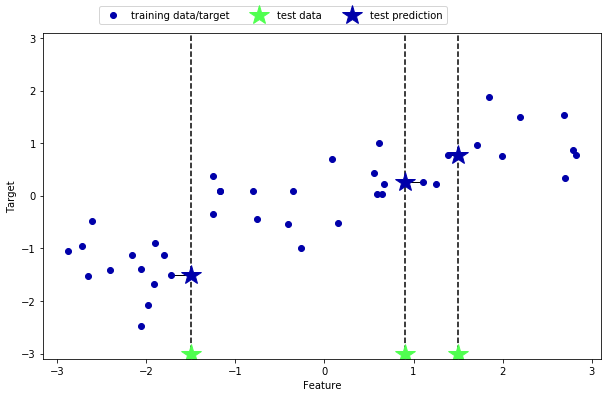

In [34]:
# Plot the knn regression for k=1
mglearn.plots.plot_knn_regression(n_neighbors=1)

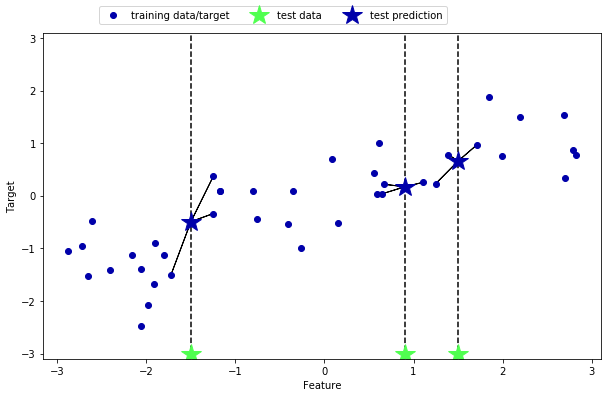

In [36]:
# Plot the knn regression for k=3
mglearn.plots.plot_knn_regression(n_neighbors=3)

The kNN algorithm for regression is implemented in the *KNeighborsRegressor* class in scikit-learn.  It's used similarly to *KNeighborsClassifier*.

In [37]:
# Import the wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

In [38]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
# Instantiate the regression model
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)

In [40]:
# Fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [42]:
# Now, we can make predictions on the test set
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using the *score* method, which for regressors returns the R² score.  The R² score, aka the *coefficient of determination*, is a measure of goodness of a prediction or a regression model, and yields a score that's usually between 0 and 1.

A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, *y_train*.  The formulation of R² here can even be negative, which can indicate anticorrelated predictions.

In [44]:
# Get the R^2 score
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83
